In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df_train = pd.read_csv('train.csv.zip', compression='zip')

In [3]:
len(df_train.index)

1503424

In [4]:
df_train.head(1)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789


Identificar colunas nulas

In [5]:
df_train.isnull().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  61576
param_2                 654542
param_3                 862565
title                        0
description             116276
price                    85362
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1             112588
deal_probability             0
dtype: int64

In [6]:
#6544e41a8817
df_train.query("item_id=='b912c3c6a6ad'")

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789


In [7]:

df_train_=df_train[['region','city','category_name',
                    'parent_category_name','param_1','title', 
                    'description', 'price','user_type','activation_date','deal_probability']]
df_train_.head()

,region,city,category_name,parent_category_name,param_1,title,description,price,user_type,activation_date,deal_probability
0,Свердловская область,Екатеринбург,Товары для детей и игрушки,Личные вещи,Постельные принадлежности,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,Private,2017-03-28,0.12789
1,Самарская область,Самара,Мебель и интерьер,Для дома и дачи,Другое,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,Private,2017-03-26,0.00000
2,Ростовская область,Ростов-на-Дону,Аудио и видео,Бытовая электроника,"Видео, DVD и Blu-ray плееры",Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,Private,2017-03-20,0.43177
3,Татарстан,Набережные Челны,Товары для детей и игрушки,Личные вещи,Автомобильные кресла,Автокресло,Продам кресло от0-25кг,2200.0,Company,2017-03-25,0.80323
4,Волгоградская область,Волгоград,Автомобили,Транспорт,С пробегом,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,Private,2017-03-16,0.20797


## Probabilidade média de aparecer na region

In [8]:
#6544e41a8817
df_train_[['region','deal_probability']].groupby('region').mean().sort_values(by='deal_probability', 
                                                                             ascending=False)

,deal_probability
region,
Оренбургская область,0.155921
Ставропольский край,0.153586
Башкортостан,0.148859
Удмуртия,0.148130
Краснодарский край,0.147066
Нижегородская область,0.146608
Саратовская область,0.145991
Волгоградская область,0.145908
Белгородская область,0.145603


In [9]:
#len(df_train_[df_train_['deal_probability']>=0.67][['deal_probability']].index)

In [10]:
#Qualidade alta
df_train_A=df_train_[df_train_['deal_probability']>=0.67] 
#Qualidade Media
df_train_M=df_train_.query("deal_probability>0.33 and deal_probability<=0.66") 
#Qualidade Baixa
df_train_B=df_train_[df_train_['deal_probability']<=0.33]  

print('Qde de rows Qualidade boa:',len(df_train_A.index))
print('Qde de rows Qualidade media:',len(df_train_M.index))
print('Qde de rows Qualidade baixa:', len(df_train_B.index))

Qde de rows Qualidade boa: 164795
Qde de rows Qualidade media: 67563
Qde de rows Qualidade baixa: 1270152


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5861FA2B0>]],
      dtype=object)

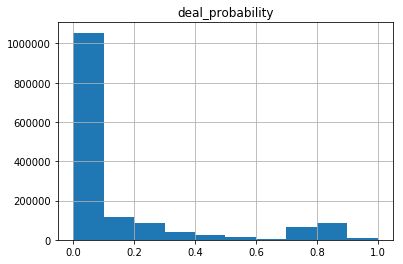

In [11]:
df_train[['deal_probability']].hist()

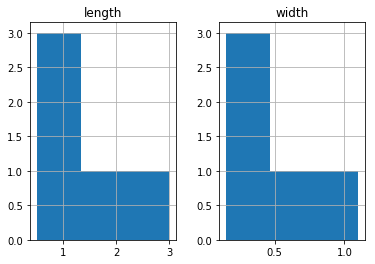

In [12]:
df = pd.DataFrame({
     'length': [1.5, 0.5, 1.2, 0.9, 3],
     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse']) 
hist = df.hist(bins=3)

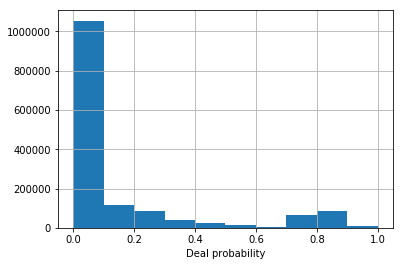

In [13]:
plt.hist(df_train['deal_probability'])
#plt.ylabel('Number of Ads')
plt.xlabel('Deal probability')
#plt.ylabel('Number of Ads')
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


In [14]:
#pd.Series([y for x in df_train_A[['description']].values.flatten() for y in x.split()]).value_counts()

In [15]:
#Bag of words
#df_train_A[['description']].apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts()

In [16]:
df_train['user_type'].unique()

array(['Private', 'Company', 'Shop'], dtype=object)

In [17]:
#Conhecendo o dados

In [18]:
df_train['user_type'].unique()

array(['Private', 'Company', 'Shop'], dtype=object)

In [19]:
df_train[['user_type','title']].groupby('user_type').count()

,title
user_type,
Company,347249
Private,1075706
Shop,80469


In [36]:
def plotPie(grp_entity):
    dic_entity={}
    entities=[]
    numbers=[]
    for row in grp_entity.itertuples():
        entity=row[0]
        attribute_value=row[1]
        dic_entity[entity]=attribute_value
        numbers.append(attribute_value)
    entities=list(dic_entity.keys())
    
    entity_data = {'entity': entities,'number': numbers}
    df_ = pd.DataFrame(entity_data, columns = ['entity', 'number'])
    

    plt.figure(figsize=(16,8))
    # plot chart
    ax1 = plt.subplot(121, aspect='equal')
    df_.plot(kind='pie', y = 'number', ax=ax1,  autopct='%1.1f%%', startangle=90, shadow=False, 
              labels=df_['entity'], legend = False, fontsize=14, title='Percentual de anúncios por Parent_category_name'
             )
    ax2 = plt.subplot(122)
    plt.axis('off')
    
    plt.show()
    

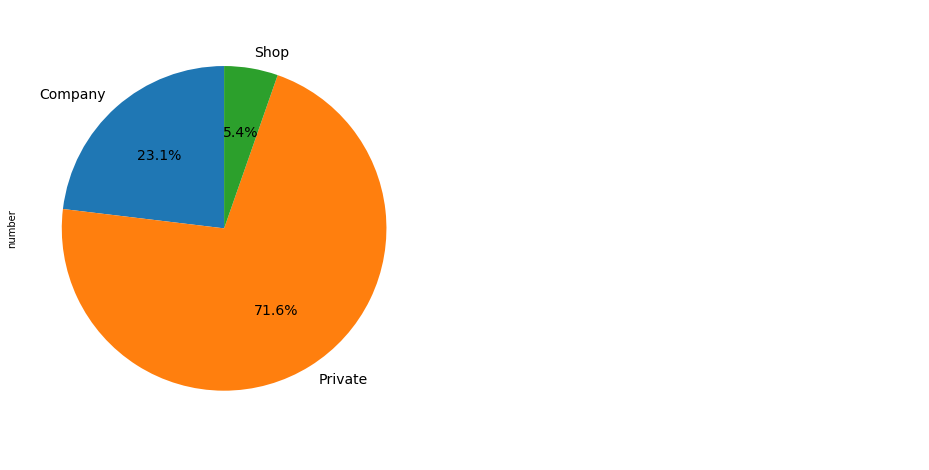

In [27]:
user_type_data = {'user_type': ['Company', 'Private', 'Shop'],
        'number': [347249, 1075706, 80469]}
df_user_type = pd.DataFrame(user_type_data, columns = ['user_type', 'number'])
#df_user_type

plt.figure(figsize=(16,8))
# plot chart

ax1 = plt.subplot(121, aspect='equal')
df_user_type.plot(kind='pie', y = 'number', ax=ax1,  autopct='%1.1f%%', startangle=90, shadow=False, 
          labels=df_user_type['user_type'], legend = False, fontsize=14
         )
ax2 = plt.subplot(122)

plt.axis('off')
plt.show()

In [28]:
grp_parent_cat_name=df_train[['parent_category_name','title']].groupby('parent_category_name').count()
grp_parent_cat_name

,title
parent_category_name,
Бытовая электроника,173008
Для бизнеса,18075
Для дома и дачи,178823
Животные,52470
Личные вещи,697623
Недвижимость,153190
Транспорт,79839
Услуги,64385
Хобби и отдых,86011


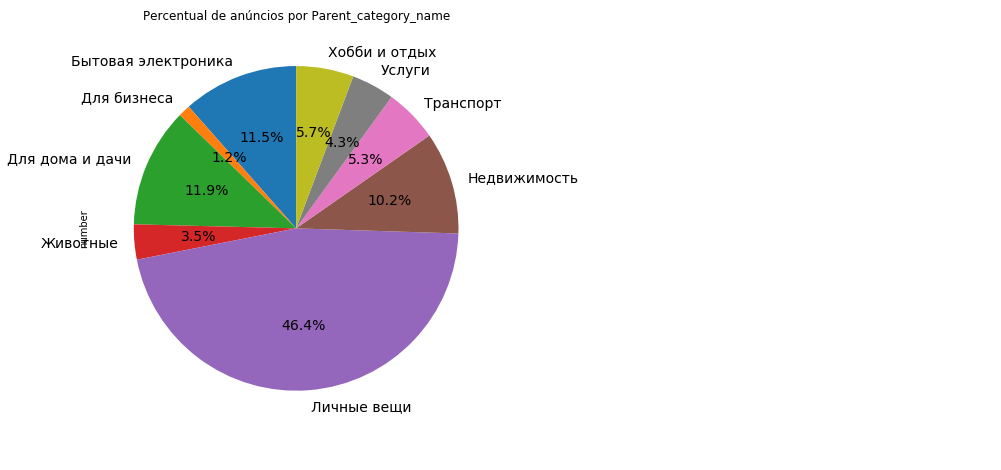

In [37]:
plotPie(grp_parent_cat_name)

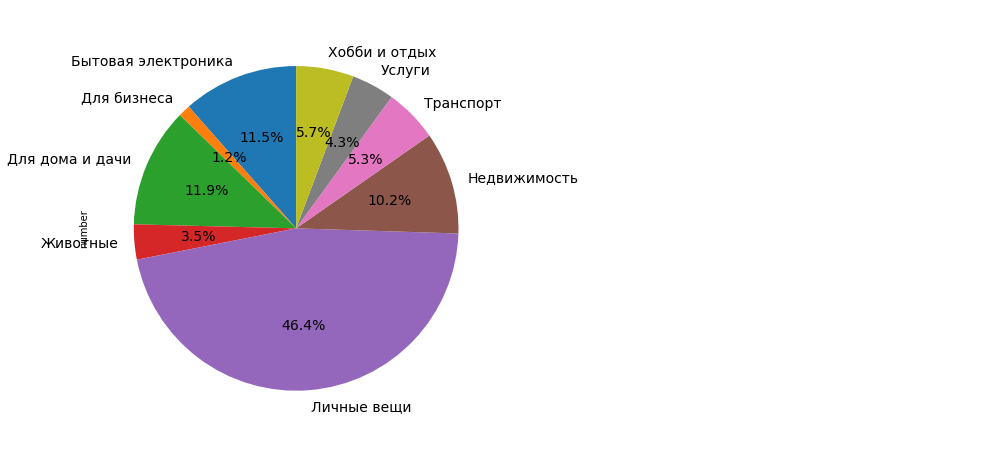

In [24]:
user_type_data = {'user_type': ['Бытовая электроника', 'Для бизнеса', 'Для дома и дачи','Животные',
                               'Личные вещи','Недвижимость','Транспорт','Услуги','Хобби и отдых'],
        'number': [173008, 18075, 178823,52470,697623,153190,79839,64385,86011]}
df_user_type = pd.DataFrame(user_type_data, columns = ['user_type', 'number'])
#df_user_type

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_user_type.plot(kind='pie', y = 'number', ax=ax1,  autopct='%1.1f%%', startangle=90, shadow=False, 
          labels=df_user_type['user_type'], legend = False, fontsize=14
         )
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()


In [25]:
len(df_train['region'].unique())

28

In [10]:
len(df_train['city'].unique())

1733

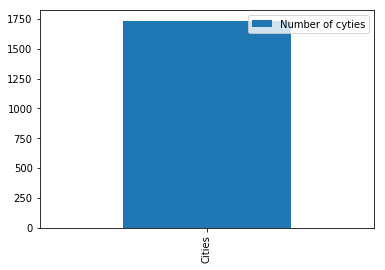

In [15]:
pd.DataFrame({'Number of cyties': len(df_train['city'].unique())}, index=['Cities']).plot(kind='bar')

In [11]:
len(df_train['category_name'].unique())

47

In [12]:
len(df_train['parent_category_name'].unique()) 

9

In [13]:
len(df_train['deal_probability'].unique()) 

18407

In [10]:
df_params=pd.DataFrame({'param_1': len(df_train['param_1'].unique()), 
                        'param_2': len(df_train['param_2'].unique()) ,
                        'param_3': len(df_train['param_3'].unique())},index=['Param 1 2 3'])

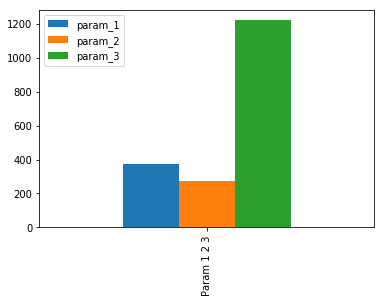

In [11]:
df_params.plot(kind='bar')

In [38]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    SELECT ?label
    WHERE { <http://dbpedia.org/resource/Asturias> rdfs:label ?label }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["label"]["value"])

ModuleNotFoundError: No module named 'SPARQLWrapper'

In [14]:
len(df_train['param_1'].unique()) 

372

In [15]:
len(df_train['param_2'].unique())

272

In [16]:
len(df_train['param_3'].unique())

1220

In [17]:
#Test

In [18]:
df_test=pd.read_csv('test.csv.zip', compression='zip')
print('Test Size=', len(df_test.index))
df_test.head(1)

Test Size= 508438


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0


In [19]:
#sample_submission
df_sample_submission=pd.read_csv('sample_submission.csv')
print('Sample submission Size=', len(df_sample_submission.index))
df_sample_submission.head(2)

Sample submission Size= 508438


,item_id,deal_probability
0,6544e41a8817,0.5
1,65b9484d670f,0.5


In [28]:
len(df_sample_submission['deal_probability'].unique())

1

In [30]:
df_sample_submission.query("item_id=='6544e41a8817'")

,item_id,deal_probability
0,6544e41a8817,0.5


In [21]:
#periods_train
df_periods_train=pd.read_csv('periods_train.csv.zip', compression='zip')
df_periods_train.head(1)

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16


In [23]:
df_periods_test=pd.read_csv('periods_test.csv.zip', compression='zip')
df_periods_test.head(1)

,item_id,activation_date,date_from,date_to
0,f3a62a713278,2017-03-13,2017-04-12,2017-04-12


In [ ]:
#

In [24]:
#periods_train
df_train_active=pd.read_csv('train_active.csv.zip', compression='zip', nrows=150000)
df_train_active.head(6)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type
0,70d6342079ef,11d4c04d8c51,Нижегородская область,Нижний Новгород,Хобби и отдых,Книги и журналы,Книги,NaN,NaN,Детская знциклопедия,"детская энциклопедия,10 томов, в книге 630 стр...",200.0,20.0,2017-03-15,Private
1,97cf505710e1,d7068c60b2c6,Воронежская область,Воронеж,Недвижимость,Гаражи и машиноместа,Продам,Гараж,Кирпичный,"Гараж, > 30 м²","Продается ГАРАЖ в ПГСК Алмаз/\nУдобный въезд, ...",590000.0,23.0,2017-03-27,Private
2,6a93a31a945d,755c88999bc7,Нижегородская область,Нижний Новгород,Недвижимость,Коммерческая недвижимость,Сдам,Торговое помещение,NaN,"Торговое помещение, 50-5000 м²",Сдаем в аренду лучшие торговые помещения Н.Нов...,100000.0,4.0,2017-03-15,Private
3,050cade37667,3d7fb2abdbbc,Башкортостан,Стерлитамак,Бытовая электроника,Телефоны,Аксессуары,Аккумуляторы,NaN,Аккумулятор на 5s / 5c,"продам батарею на iphone 5s , 5с",750.0,157.0,2017-03-15,Company
4,2935e85aa40b,fc1be1a809d1,Татарстан,Казань,Для дома и дачи,Ремонт и строительство,Камины и обогреватели,NaN,NaN,"Заглушки, дверцы, плита","Всё для печи: плита, заглушка, дверцы- всё нов...",3900.0,27.0,2017-03-15,Private
5,deb7355cbd7e,7fe1e284ccff,Саратовская область,Вольск,Для дома и дачи,Ремонт и строительство,Инструменты,NaN,NaN,Советская дрель,Продам советскую дрель в хорошем состоянии . П...,1000.0,44.0,2017-03-15,Private


In [25]:
df_train_active.query("item_id=='b912c3c6a6ad'")

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type


In [17]:
measurements = [
     {'city': 'Dubai', 'temperature': 33.},
     {'city': 'London', 'temperature': 12.},
     {'city': 'San Francisco', 'temperature': 18.},
     {'city': 'Paris', 'temperature': 18.},]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0.,  0., 33.],
       [ 0.,  1.,  0.,  0., 12.],
       [ 0.,  0.,  0.,  1., 18.],
       [ 0.,  0.,  1.,  0., 18.]])

In [18]:
vec.get_feature_names()


['city=Dubai',
 'city=London',
 'city=Paris',
 'city=San Francisco',
 'temperature']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()
vectorizer  

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [28]:
df_train_M_=df_train_M[['description']].fillna('')
df_train_M_.head(1)

,description
2,"В хорошем состоянии, домашний кинотеатр с blu ..."


In [53]:
""" corpus = ['This is the first document.',
     'This is the second second document.',
     'And the third one.',
     'Is this the first document?', ]
"""
#corpus=df_train_M_['description'].values
corpus=list(df_train_M_['description'].values)

In [54]:
analyze = vectorizer.build_analyzer()

In [55]:
X = vectorizer.fit_transform(corpus)
X    

<67563x112924 sparse matrix of type '<class 'numpy.int64'>'
	with 1425071 stored elements in Compressed Sparse Row format>

In [56]:
X.toarray()

MemoryError: 

In [57]:
y=df_train_M['deal_probability'].values
y.shape

(67563,)

In [59]:
len(vectorizer.get_feature_names())

112924

In [60]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '000001',
 '0000088',
 '0000099',
 '00001',
 '00003',
 '0000р',
 '0001',
 '00095a',
 '000км',
 '000р',
 '000руб',
 '000рублей',
 '000т',
 '000труба',
 '000тыс',
 '001',
 '002',
 '0020049296',
 '0020053968',
 '002b',
 '002x3',
 '002с',
 '003',
 '004',
 '005',
 '0050',
 '005k',
 '006',
 '00605a',
 '006651',
 '006r01160',
 '007',
 '008',
 '009',
 '0095',
 '00ghz',
 '00гб',
 '00до',
 '00до8',
 '00м',
 '00р',
 '00руб',
 '00см',
 '00т',
 '00ч',
 '01',
 '010',
 '01160a',
 '0117018',
 '012',
 '0124',
 '012г',
 '015',
 '015100',
 '0151830',
 '01587',
 '016',
 '01604',
 '018',
 '01955b',
 '01958',
 '01958b',
 '01969a',
 '01cc',
 '01cd',
 '01d',
 '01h',
 '01j',
 '01u',
 '01ф',
 '02',
 '020',
 '02000',
 '02069',
 '021',
 '0216',
 '022',
 '0225',
 '02380',
 '0248',
 '0249',
 '025',
 '0255',
 '0258',
 '026',
 '02690d01',
 '027',
 '02740',
 '02748р',
 '028',
 '02854р',
 '029',
 '029620',
 '02t5',
 '02tb',
 '02vg',
 '02vl',
 '02мм',
 '02ф',
 '03',
 '030',
 '0303',
 

In [38]:
#X.toarray() 
X.shape

(67563, 112924)

#The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:



In [42]:
n=40000
X_train=X[n:]
y_train=y[n:]

In [51]:
from sklearn.svm import SVC
clf=None
clf = SVC()
clf.fit(X_train, y_train) 

ValueError: Unknown label type: 'continuous'

In [44]:
X_test=X[:n]
y_test=y[:n]

In [47]:
vectorizer.vocabulary_.get('document')

1

In [16]:
arr_corpus=df_train_M['description'].values

#list(df_train_M['description'].values)